In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [12]:
data = pd.read_csv("House_Rent_Dataset.csv")

In [13]:
data.shape

(4746, 12)

In [14]:
data['Rent'].describe()

count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

<Axes: ylabel='Frequency'>

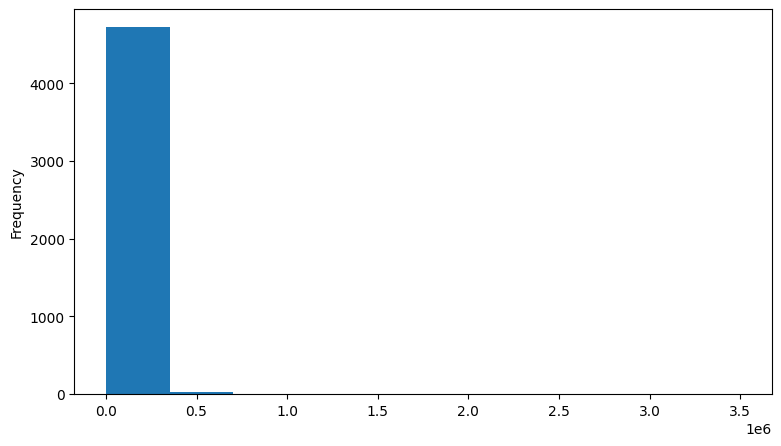

In [15]:
plt.figure(figsize = (9, 5))
data['Rent'].plot(kind ="hist")

In [18]:
data['Posted On'] = pd.to_datetime(data['Posted On'])
data.dtypes

Posted On            datetime64[ns]
BHK                           int64
Rent                          int64
Size                          int64
Floor                        object
Area Type                    object
Area Locality                object
City                         object
Furnishing Status            object
Tenant Preferred             object
Bathroom                      int64
Point of Contact             object
dtype: object

In [31]:
data.iloc[:,1:]

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [32]:
corrmat = data.corr(numeric_only=True)

<Axes: >

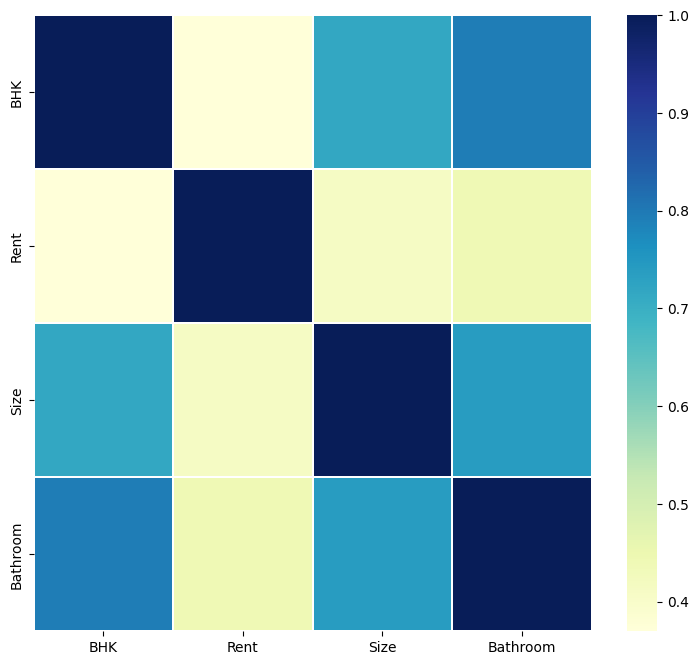

In [33]:
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

[None, None, None, None, None, None, None, None]

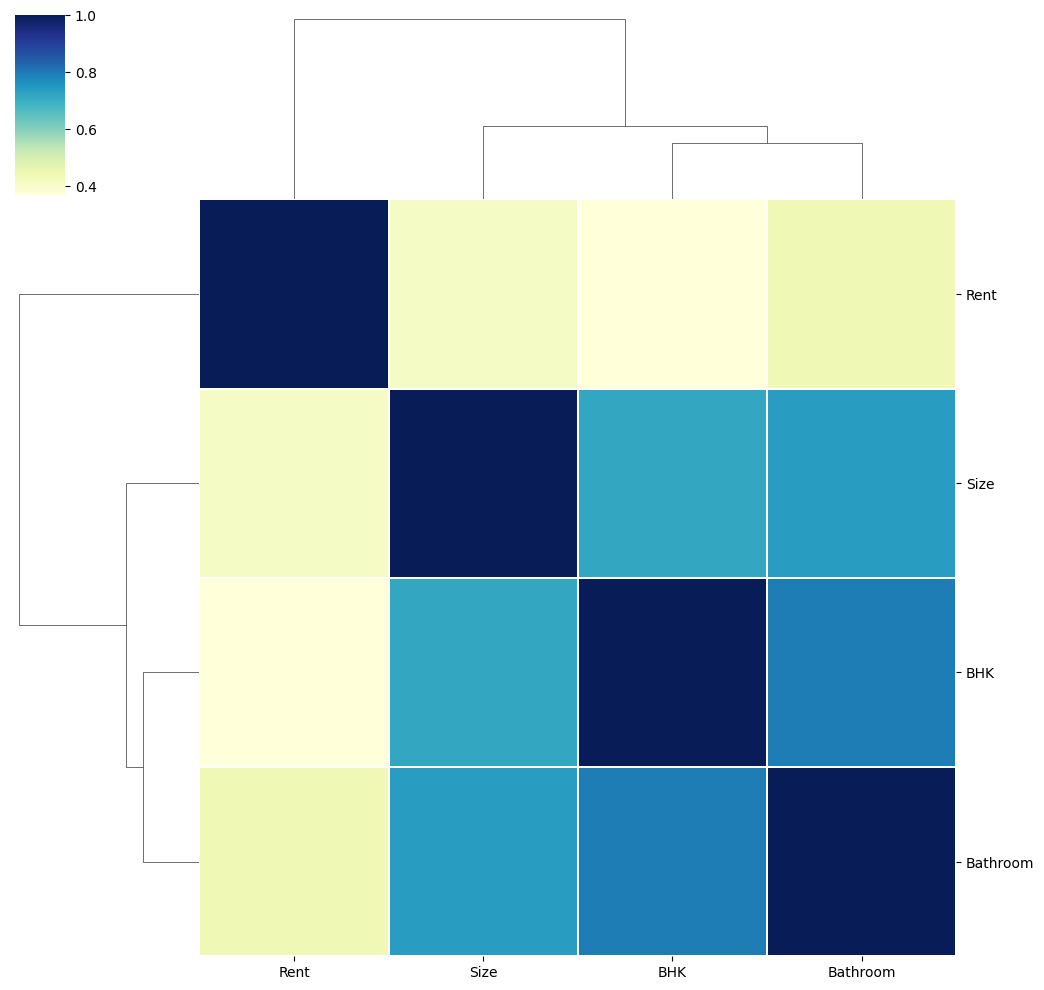

In [36]:
corrmat = data.corr(numeric_only=True);

cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)

<Axes: >

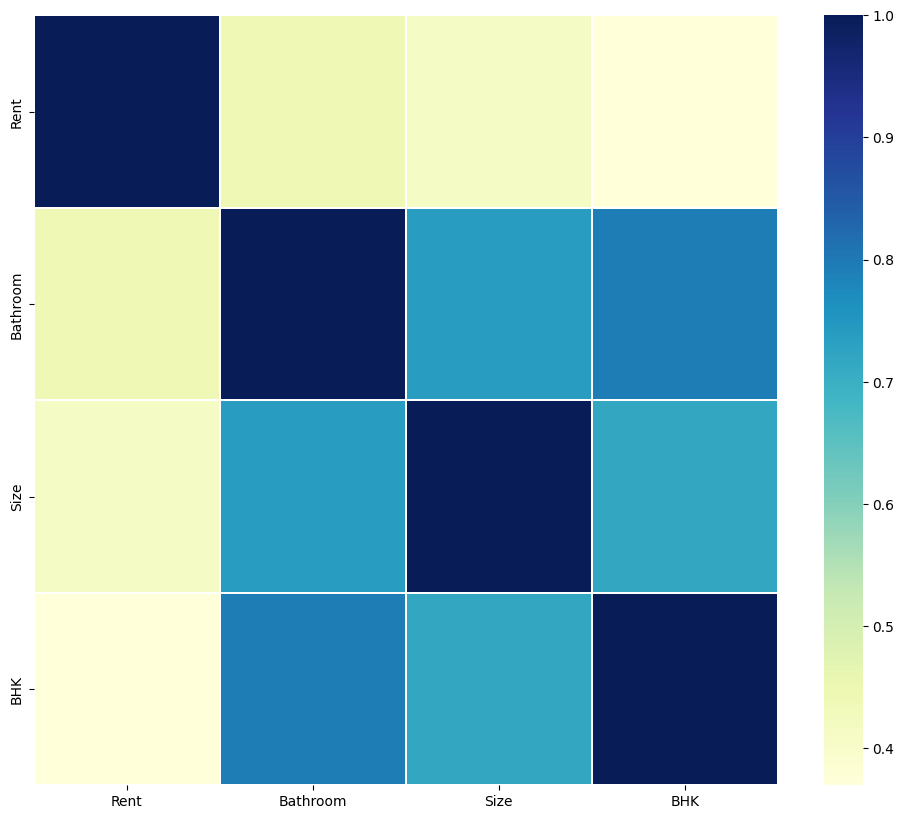

In [37]:
k = 15

cols = corrmat.nlargest(k, 'Rent')['Rent'].index

cm = np.corrcoef(data[cols].values.T)
f, ax = plt.subplots(figsize =(12, 10))

sns.heatmap(cm, ax = ax, cmap ="YlGnBu",
            linewidths = 0.1, yticklabels = cols.values,
                              xticklabels = cols.values)